<a href="https://colab.research.google.com/github/Musungu-Maureen/IP-WEEK-6-CORE/blob/main/Maureen_Musungu_Week_6_IP_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football prediction

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To create a model which will predict the result of a game between team 1 and team 2 either at home or away and on whether or not the game is friendly while also checking the team's rankings. 

### b) Defining the Metric for Success

The project will be considered a success if the models created are able to predict results of a game. 

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest.





### d) Experimental design taken

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. We will also create models using polynomial regression and logistic regression


### e) Data Relevance

We will be using two datasets:


1.  'fifa_rankings.csv' - This is a file that shows FIFA rankings and points on a monthly basis from 1993 to 2018. 


2.  'results.csv' - This file gives the international soccer matches from 1872 to 2019 showing the teams, scores tournament type and the country where in the game was played. 

The availed datasets are suitable to be used to create models to predict the result of a game between team 1 and 2, looking at their location as either home or away and whether the match was friendly or not.




## 2. Reading the Data

In [95]:
#First we will import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Loading the Data from the source
# ---
ranking = pd.read_csv('fifa_ranking.csv')
#Previewing the upper part of the data
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [3]:
#Previewing the lower part of the data
ranking.tail(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
# Loading the results Dataframe 
# ---
results = pd.read_csv('results.csv')
#Previewing the upper part of the data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


## 3. Checking the Datasets

In [6]:
# Determining the no. of records in our dataset
#
print("Fifa Rankings:", ranking.shape)
print("Results: ", results.shape)


Fifa Rankings: (57793, 16)
Results:  (40839, 9)


In [8]:
# Checking whether each column has an appropriate datatype

print("Datatypes for ranking dataset: ")
print(ranking.dtypes)
print("*****************")
print("Datatypes for results dataset: ")
print(results.dtypes)


Datatypes for ranking dataset: 
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
*****************
Datatypes for results dataset: 
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 4. Tidying the Dataset

In [9]:
#First, we change the columns containing dates from the datatype object
#to datetime in both datasets
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [10]:
#Checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

* There are no null values in the results dataset. 

In [11]:
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

* There are no null values in the fifa rankings dataset.

In [16]:
#Dropping columns that will not be used

rankings = ranking.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted',
                          'rank_date','two_year_ago_weighted', 'three_year_ago_weighted']] 
rankings.head(2)                         

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0


In [18]:
#Calculating the weighted points
rankings['total_weighted'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings.head(2)

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points,total_weighted
0,1,Germany,GER,0.0,1993-08-08,0.0,0.0,0.0,0.0
1,2,Italy,ITA,0.0,1993-08-08,0.0,0.0,0.0,0.0


* Rankings points on the fifa ranking dataset started from 21/09/2011, we will threfore use data from 21/09/2011 onwards for this analysis

In [19]:
##Obtaining the matches to involve according to their date of occurence 

rankings_df = rankings[rankings['rank_date'] > '2011-08-24']
results_df = results[results['date'] > '2011-08-24']
print("Rankings DF: ", rankings_df.shape)
print("Results DF: ", results_df.shape)

Shape of rankings_df:  (17208, 9)
Shape of results_df:  (7558, 9)


In [20]:
# Changing the datatype of the columns containing dates to year
import datetime

rankings_df['year'] = rankings_df['rank_date'].dt.year
rankings_df.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points,total_weighted,year
57788,206,Anguilla,AIA,0.0,2018-06-07,0.0,0.0,0.0,0.0,2018
57789,206,Bahamas,BAH,0.0,2018-06-07,0.0,0.0,0.0,0.0,2018
57790,206,Eritrea,ERI,0.0,2018-06-07,0.0,0.0,0.0,0.0,2018
57791,206,Somalia,SOM,0.0,2018-06-07,0.0,0.0,0.0,0.0,2018
57792,206,Tonga,TGA,0.0,2018-06-07,0.0,0.0,0.0,0.0,2018


In [21]:
results_df['year'] = results_df['date'].dt.year
results_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


There is a disparity in the dates between the two datasets. We will therefore drop the data for year 2019 in the results dataframe.



In [ ]:
## Displaying the info of the results dataframe
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 33281 to 40838
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        7558 non-null   datetime64[ns]
 1   home_team   7558 non-null   object        
 2   away_team   7558 non-null   object        
 3   home_score  7558 non-null   int64         
 4   away_score  7558 non-null   int64         
 5   tournament  7558 non-null   object        
 6   city        7558 non-null   object        
 7   country     7558 non-null   object        
 8   neutral     7558 non-null   bool          
 9   year        7558 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(5)
memory usage: 597.8+ KB


In [ ]:
## Incorporating data below year 2019

results_df = results_df[results_df['year'] < 2019]
results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [22]:
# Dropping unnecessary columns
rankings_data = rankings_df[['rank', 'country_full', 'weighted_points', 'year']]
rankings_data = rankings_data.groupby(['year', 'country_full'], as_index=False).agg({'rank': 'mean', 'weighted_points': 'mean'})
rankings_data.head(3)

,year,country_full,rank,weighted_points
0,2011,Afghanistan,180.50,75.3975
1,2011,Albania,72.75,302.0700
2,2011,Algeria,35.25,557.0125


In [24]:
# Dropping columns for results dataset
results_data = results_df[['home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'year']]
results_data.reset_index(drop=True, inplace=False).head(3)      

,home_team,away_team,home_score,away_score,tournament,country,year
0,United Arab Emirates,Qatar,3,1,Friendly,United Arab Emirates,2011
1,Bahrain,Sudan,1,0,Friendly,Bahrain,2011
2,Angola,DR Congo,1,2,Friendly,Angola,2011


In [32]:
## Merging the two datasets
df = results_data.merge(rankings_data, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
df = df.merge(rankings_data, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
df.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
df.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,weighted_points_x,rank_y,weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495
2,Indonesia,Qatar,2,3,FIFA World Cup qualification,141.25,151.8750,95.0,311.495
3,United Arab Emirates,Kuwait,2,3,FIFA World Cup qualification,118.75,161.6250,98.5,255.315
4,Oman,Kuwait,1,0,Friendly,96.50,289.5250,98.5,255.315


In [33]:
#Changing column names
df.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'weighted_points_x':'home_team_weighted_points',
                     'weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
df.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495
2,Indonesia,Qatar,2,3,FIFA World Cup qualification,141.25,151.8750,95.0,311.495
3,United Arab Emirates,Kuwait,2,3,FIFA World Cup qualification,118.75,161.6250,98.5,255.315
4,Oman,Kuwait,1,0,Friendly,96.50,289.5250,98.5,255.315


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 5736
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home_team                  5737 non-null   object 
 1   away_team                  5737 non-null   object 
 2   home_score                 5737 non-null   int64  
 3   away_score                 5737 non-null   int64  
 4   tournament                 5737 non-null   object 
 5   home_team_rank             5737 non-null   float64
 6   home_team_weighted_points  5737 non-null   float64
 7   away_team_rank             5737 non-null   float64
 8   away_team_weighted_points  5737 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 448.2+ KB


Our merged dataset has no null values and the datatypes are also appropriate hence no more data cleaning required, we therefore move to EDA

## 5. Exploratory Data Analysis

In [36]:
## Displaying the statistical values of our dataframe
df.describe()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
count,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000,5737.000000
mean,1.526756,1.048283,81.365656,397.851981,84.673131,380.139970
std,1.497798,1.222296,53.760750,261.660895,54.160607,254.211004
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35.000000,200.085000,38.916667,187.636667
50%,1.000000,1.000000,76.416667,343.468333,79.500000,331.887500
75%,2.000000,2.000000,121.666667,545.732500,124.416667,531.563333
max,15.000000,10.000000,207.916667,1264.343333,207.000000,1264.343333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00b8fe8b10>,
      dtype=object)

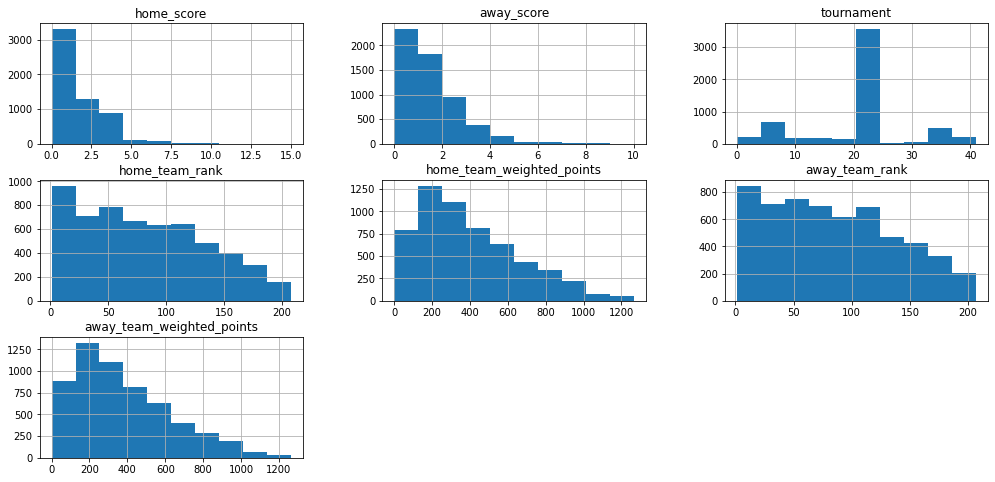

In [111]:
# Checking for data distribution using histograms
df.hist(bins=10, figsize=[17,8])

The data does not show a perfect normal distribution. 




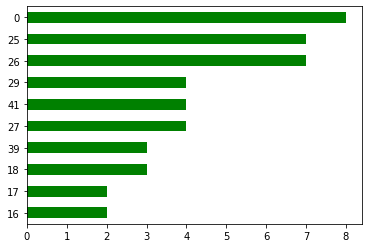

In [109]:
#Checking tournament type value counts

df.tournament.value_counts().sort_values().head(10).plot(kind = 'barh', color='green')

#The tournament type ABCS recorded the highest number of matches

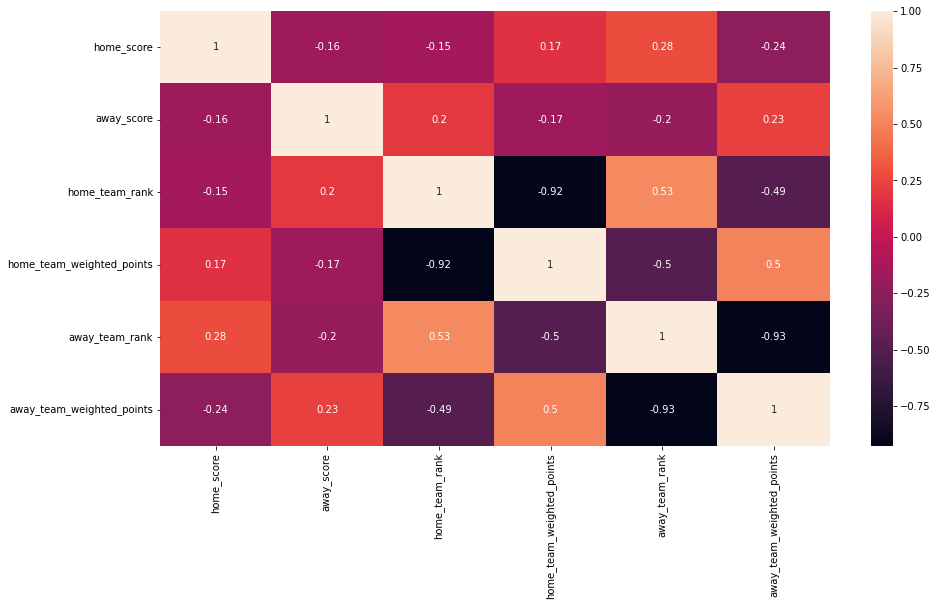

In [42]:
#Checking for feature correlation
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(method='pearson'), annot=True)

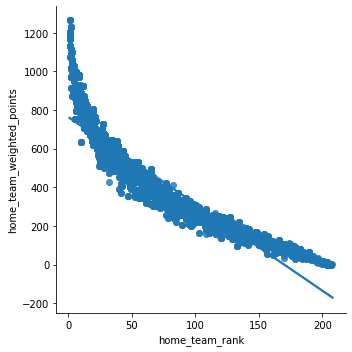

In [113]:
 sns.lmplot(x="home_team_rank", y="home_team_weighted_points", data=df)

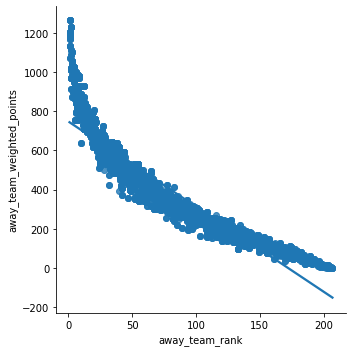

In [47]:
sns.lmplot(x="away_team_rank", y="away_team_weighted_points", data=df)

The above plots show that there is a strong negative correlation between rank and total weighted points of the teams. 




In [49]:
home = df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# merge it into one
team_score = home.append(away).reset_index(drop=True)
# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})
del home,away
country_info.tail()

,team,nb_goals,nb_matches,goal_avg
191,Vietnam,88,55,1.600000
192,Wales,73,62,1.177419
193,Yemen,33,56,0.589286
194,Zambia,123,110,1.118182
195,Zimbabwe,109,79,1.379747


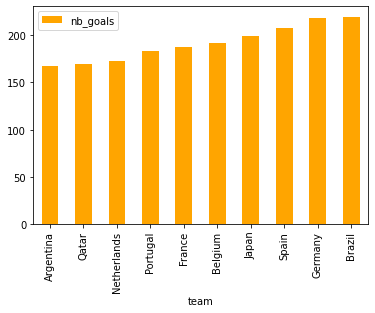

In [108]:
#Top 10 countries by number of goals
country_info.nlargest(10,['nb_goals']).sort_values(by='nb_goals').plot(kind='bar',x='team',y='nb_goals', color='orange')

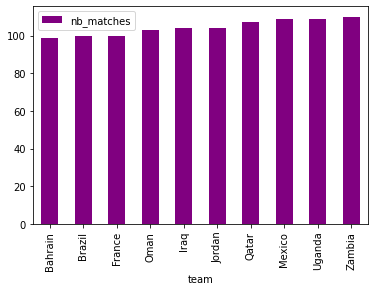

In [116]:
#Top 10 countries by number of goals
country_info.nlargest(10, ['nb_matches']).sort_values(by='nb_matches').plot(kind='bar',x='team',y='nb_matches', color='purple')

## 6. Feature Engineering

First we create a new column 'Status' that contains results on whether a match was a win, lose or draw from the home team perspective

In [63]:
#Creating a new column 'Status' 
def status_load(value):
    if value['home_score'] == value['away_score']:
        val = 'Draw'
    elif value['home_score'] > value['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

df['Status'] = df.apply(status_load, axis=1)

df.head(2)

,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,118.75,161.6250,95.0,311.495,Win
1,Bahrain,Qatar,0,0,FIFA World Cup qualification,101.50,282.6375,95.0,311.495,Draw


Then we change the categorical columns into binary

---



In [64]:
#Change status and tournament to categories
data['tournament'] = data['tournament'].astype('category')
data['Status'] = data['Status'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5737 entries, 0 to 5736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   home_team          5737 non-null   object  
 1   away_team          5737 non-null   object  
 2   home_score         5737 non-null   int64   
 3   away_score         5737 non-null   int64   
 4   tournament         5737 non-null   category
 5   rank_x             5737 non-null   float64 
 6   weighted_points_x  5737 non-null   float64 
 7   rank_y             5737 non-null   float64 
 8   weighted_points_y  5737 non-null   float64 
 9   Status             5737 non-null   category
dtypes: category(2), float64(4), int64(2), object(2)
memory usage: 416.3+ KB


In [66]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
data['Status']= label_encoder.fit_transform(data['Status']) 
  
print(data['Status'].unique()) 
data.head()
#Where 2:win, 1: lose, 0:Draw

[2 0 1]


,home_team,away_team,home_score,away_score,tournament,rank_x,weighted_points_x,rank_y,weighted_points_y,Status
0,United Arab Emirates,Qatar,3,1,22,118.75,161.6250,95.0,311.495,2
1,Bahrain,Qatar,0,0,21,101.50,282.6375,95.0,311.495,0
2,Indonesia,Qatar,2,3,21,141.25,151.8750,95.0,311.495,1
3,United Arab Emirates,Kuwait,2,3,21,118.75,161.6250,98.5,255.315,1
4,Oman,Kuwait,1,0,22,96.50,289.5250,98.5,255.315,2


In [117]:
# Encode labels in column 'tournament'. 
df['tournament']= label_encoder.fit_transform(df['tournament']) 
  
print(df['tournament'].unique()) 
df.head()


[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,22,118.75,161.6250,95.0,311.495,Win
1,Bahrain,Qatar,0,0,21,101.50,282.6375,95.0,311.495,Draw
2,Indonesia,Qatar,2,3,21,141.25,151.8750,95.0,311.495,Lose
3,United Arab Emirates,Kuwait,2,3,21,118.75,161.6250,98.5,255.315,Lose
4,Oman,Kuwait,1,0,22,96.50,289.5250,98.5,255.315,Win


As explained earlier we will use Polynomial Regression and logistic Regression for this study.
For polynomial approach we will use two models:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

We will separate our data into two to prepare it for modelling using both models


In [69]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'home_team_rank', 'home_team_weighted_points', 'away_team_rank',
       'away_team_weighted_points', 'Status'],
      dtype='object')

In [104]:
home = df[['home_score', 'tournament', 'home_team_rank','away_team_rank', 'home_team_weighted_points']]
home.head(3)

,home_score,tournament,home_team_rank,away_team_rank,home_team_weighted_points
0,3,22,118.75,95.0,161.6250
1,0,21,101.50,95.0,282.6375
2,2,21,141.25,95.0,151.8750


In [72]:
away =df[['away_score', 'tournament','home_team_rank', 'away_team_rank', 'away_team_weighted_points']]
away.head(2)

,away_score,tournament,home_team_rank,away_team_rank,away_team_weighted_points
0,1,22,118.75,95.0,311.495
1,0,21,101.50,95.0,311.495


## 7. Checking for multicollinearlity

In [102]:
#Dropping target variable
ind_home = home.drop(columns=['home_score'])

In [103]:
## Plotting the correlation table
correlations = ind_home.corr()
correlations

,tournament,home_team_rank,away_team_rank,home_team_weighted_points
tournament,1.000000,-0.184170,-0.183864,0.198956
home_team_rank,-0.184170,1.000000,0.528137,-0.923834
away_team_rank,-0.183864,0.528137,1.000000,-0.501706
home_team_weighted_points,0.198956,-0.923834,-0.501706,1.000000


In [75]:
#Checking for multicollinearlity in the home dataset

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,tournament,home_team_rank,away_team_rank,home_team_weighted_points
tournament,1.051923,-0.051443,0.122594,-0.195305
home_team_rank,-0.051443,7.097409,-0.618914,6.256549
away_team_rank,0.122594,-0.618914,1.403615,0.108038
home_team_weighted_points,-0.195305,6.256549,0.108038,6.873072




home_team_rank and home_team_weighted_points has a value approaching 7,meaning critical levels of multicollinearity where the coefficients are poorly estimated, and the p-values are questionable. We remove one of them from our dataset to check if the VIF of our dataset will improve. 

In [76]:
# Dropping the column for weighted points
ind_home = ind_home.drop(columns=['home_team_weighted_points'])
correlations = ind_home.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,tournament,home_team_rank,away_team_rank
tournament,1.046374,0.126343,0.125664
home_team_rank,0.126343,1.402080,-0.717260
away_team_rank,0.125664,-0.717260,1.401917


The VIF for home_team_rank has dropped drastically to a value of 1

In [77]:
#Checking for multicollinearlity in the away dataset
ind_away = away.drop(columns=['away_score', 'away_team_weighted_points'])
correlations = ind_away.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,tournament,home_team_rank,away_team_rank
tournament,1.046374,0.126343,0.125664
home_team_rank,0.126343,1.402080,-0.717260
away_team_rank,0.125664,-0.717260,1.401917


We separate the target and remove the weighted points column, the VIF turns out great

In [79]:
#Checking for multicollinearlity in the data datasets
#(We will use this dataset for logistic regression)
#Checking for multicollinearlity in the away dataset
matches = df.drop(columns=['Status'])
correlations = matches.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
home_score,1.269370,-0.027232,0.011466,0.283421,-0.280219,-0.737329,-0.094806
away_score,-0.027232,1.226536,-0.019620,-0.573384,-0.037425,0.230368,-0.330083
tournament,0.011466,-0.019620,1.061358,0.004751,-0.148242,-0.124150,-0.253951
home_team_rank,0.283421,-0.573384,0.004751,7.644301,6.456155,-2.054350,-1.146166
home_team_weighted_points,-0.280219,-0.037425,-0.148242,6.456155,7.201513,-1.019485,-1.367319
away_team_rank,-0.737329,0.230368,-0.124150,-2.054350,-1.019485,8.077120,6.772425
away_team_weighted_points,-0.094806,-0.330083,-0.253951,-1.146166,-1.367319,6.772425,7.492275


The VIF for team ranks and weighted points are very high, therefore we remove the columns for team weighted points and check for multicollinearlity again

In [80]:
matches = matches.drop(columns=['home_team_weighted_points', 'away_team_weighted_points'])
correlations = matches.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,tournament,home_team_rank,away_team_rank
home_score,1.255438,-0.035588,-0.000075,0.536267,-0.642367
away_score,-0.035588,1.210622,-0.033541,-0.536120,0.531777
tournament,-0.000075,-0.033541,1.047304,0.140756,0.111461
home_team_rank,0.536267,-0.536120,0.140756,1.855482,-1.212819
away_team_rank,-0.642367,0.531777,0.111461,-1.212819,1.948642


The values for the VIF have dropped to an acceptable score hence for modelling we will not use the feature for team weighted points

## 8. Modelling

### **Logistic Regression**

In [82]:
matches = df.drop(columns=['home_team_weighted_points', 'away_team_weighted_points'])
matches.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Status
0,United Arab Emirates,Qatar,3,1,22,118.75,95.0,Win
1,Bahrain,Qatar,0,0,21,101.50,95.0,Draw
2,Indonesia,Qatar,2,3,21,141.25,95.0,Lose
3,United Arab Emirates,Kuwait,2,3,21,118.75,98.5,Lose
4,Oman,Kuwait,1,0,22,96.50,98.5,Win


We are making a prediction for the home team, whether a game will be a win(2), lose(1) or a draw(0).
We pick 'Status' as our target and the rest of the variables as the features. 

**Modelling**

In [83]:
#Splitting the data
X = matches.iloc[:, 2:7].values
y = matches.iloc[:, 7].values
print(X)
print(y)

[[  3.           1.          22.         118.75        95.        ]
 [  0.           0.          21.         101.5         95.        ]
 [  2.           3.          21.         141.25        95.        ]
 ...
 [  2.           5.           7.         154.66666667 144.5       ]
 [  3.           0.           7.          91.66666667 154.66666667]
 [  1.           1.           7.         127.5        168.66666667]]
['Win' 'Draw' 'Lose' ... 'Lose' 'Win' 'Draw']


In [85]:
#Training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [86]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)
y_pred

array(['Draw', 'Lose', 'Draw', ..., 'Win', 'Lose', 'Draw'], dtype=object)

In [88]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[278,   0,   0],
       [  0, 323,   0],
       [  0,   0, 547]])

From the confudsion matrix there were 278 draws, 547 wins and 323 losses, with regards to the home team. This information is in tandem with the actual figures.  



In [89]:
#accuracy score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 1.00


### Challenging the solution

**Hyperparameter tuning**

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
num_folds=10
num_folds = 10
seed = 7
scoring = 'accuracy'
results = []
names = []
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
penalty = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailed

Best: 1.0 using {'C': 0.1, 'penalty': 'l2'}


**Validating the model**

In [91]:
#Data preparation
scaler = StandardScaler().fit(X_train)
s_X = scaler.transform(X_train)
model = LogisticRegression(C=0.1, penalty='l2')
model.fit(s_X, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
from sklearn.metrics import accuracy_score
#Estimating accuracy
s_X_test = scaler.transform(X_test)
predictions = model.predict(s_X_test)
print(accuracy_score(y_test, predictions))


1.0


There are no residuals in this logistic model. 